<a href="https://colab.research.google.com/github/ProboKrishnacahya/Machine_Learning/blob/main/Week6_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0706012010039 - Probo Krishnacahya
**IMT01306601-A Machine Learning**

Assignment 5: SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1 Breast Cancer
Gunakan dataset iris pada link berikut https://raw.githubusercontent.com/elflin/datasets/main/BreastCancer.csv </br>
untuk melakukan klasifikasi menggunakna Support Vector Machine

## Load Dataset

In [2]:
# Load data dari link github berikut
# Munculkan head() dari data
url = 'https://raw.githubusercontent.com/elflin/datasets/main/BreastCancer.csv'
data = pd.read_csv(url)

In [3]:
# Munculkan informasi dari column pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Drop missing value pada Unnamed: 32
data.dropna(axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Munculkan deskripsi dari masing-masing column pada data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Munculkan jumlah data untuk masing-masing class
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Pre-procesing Data

In [7]:
# Pisahkan dataset menjadi x dan y menggunakan loc
X, y = data.loc[:,data.columns != 'diagnosis'], data.loc[:,'diagnosis']

In [8]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head

<bound method NDFrame.head of            0         1         2         3         4         5         6   \
0    0.000915  0.521037  0.022658  0.545989  0.363733  0.593753  0.792037   
1    0.000915  0.643144  0.272574  0.615783  0.501591  0.289880  0.181768   
2    0.092495  0.601496  0.390260  0.595743  0.449417  0.514309  0.431017   
3    0.092547  0.210090  0.360839  0.233501  0.102906  0.811321  0.811361   
4    0.092559  0.629893  0.156578  0.630986  0.489290  0.430351  0.347893   
..        ...       ...       ...       ...       ...       ...       ...   
564  0.001007  0.690000  0.428813  0.678668  0.566490  0.526948  0.296055   
565  0.001007  0.622320  0.626987  0.604036  0.474019  0.407782  0.257714   
566  0.001008  0.455251  0.621238  0.445788  0.303118  0.288165  0.254340   
567  0.001008  0.644564  0.663510  0.665538  0.475716  0.588336  0.790197   
568  0.000092  0.036869  0.501522  0.028540  0.015907  0.000000  0.074351   

           7         8         9   ...       

In [9]:
# Setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 32)

## Support Vector Machine

In [10]:
from sklearn.svm import SVC
# Buat model menggunakan support vector machine
svmRBF = SVC(kernel='rbf')

# Lakukan training dengan dataset train
svmRBF.fit(X_train, y_train)

SVC()

In [11]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
y_pred = svmRBF.predict(X_test)
print('Prediction: {}'.format(y_pred))

Prediction: ['B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B']


In [12]:
# Print akurasi dari data testing menggunakan score
print('SVM accuracy is:', svmRBF.score(X_test, y_test)) # accuracy

SVM accuracy is: 0.9883040935672515


In [13]:
from sklearn.metrics import confusion_matrix
# Matriks confusion array using sklearn
cm = confusion_matrix(y_test, y_pred)

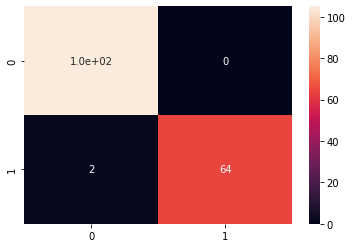

In [14]:
# Munculkan heatmap dari matriks confusion
sns.heatmap(cm, annot = True)

In [15]:
# Model Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.diagnosis.unique()))

              precision    recall  f1-score   support

           M       0.98      1.00      0.99       105
           B       1.00      0.97      0.98        66

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [16]:
# Parameter Tuning for SVM
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [17]:
# mencari parameter terbaik
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


# Exercise 2 Orthopedic Datasets
Gunakan dataset iris pada link berikut https://raw.githubusercontent.com/elflin/datasets/main/orthopedic_3class.csv </br>
untuk melakukan klasifikasi menggunakan Support Vector Machine


## Load Dataset

In [18]:
# Load data dari link github berikut
# Munculkan head() dari data
url = 'https://raw.githubusercontent.com/elflin/datasets/main/orthopedic_3class.csv'
data = pd.read_csv(url)

# Munculkan head() dari data
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [19]:
# Munculkan informasi dari column pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class_status              310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [20]:
# Munculkan deskripsi dari masing-masing column pada data
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [21]:
# Munculkan jumlah data untuk masing-masing class
data.class_status.value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class_status, dtype: int64

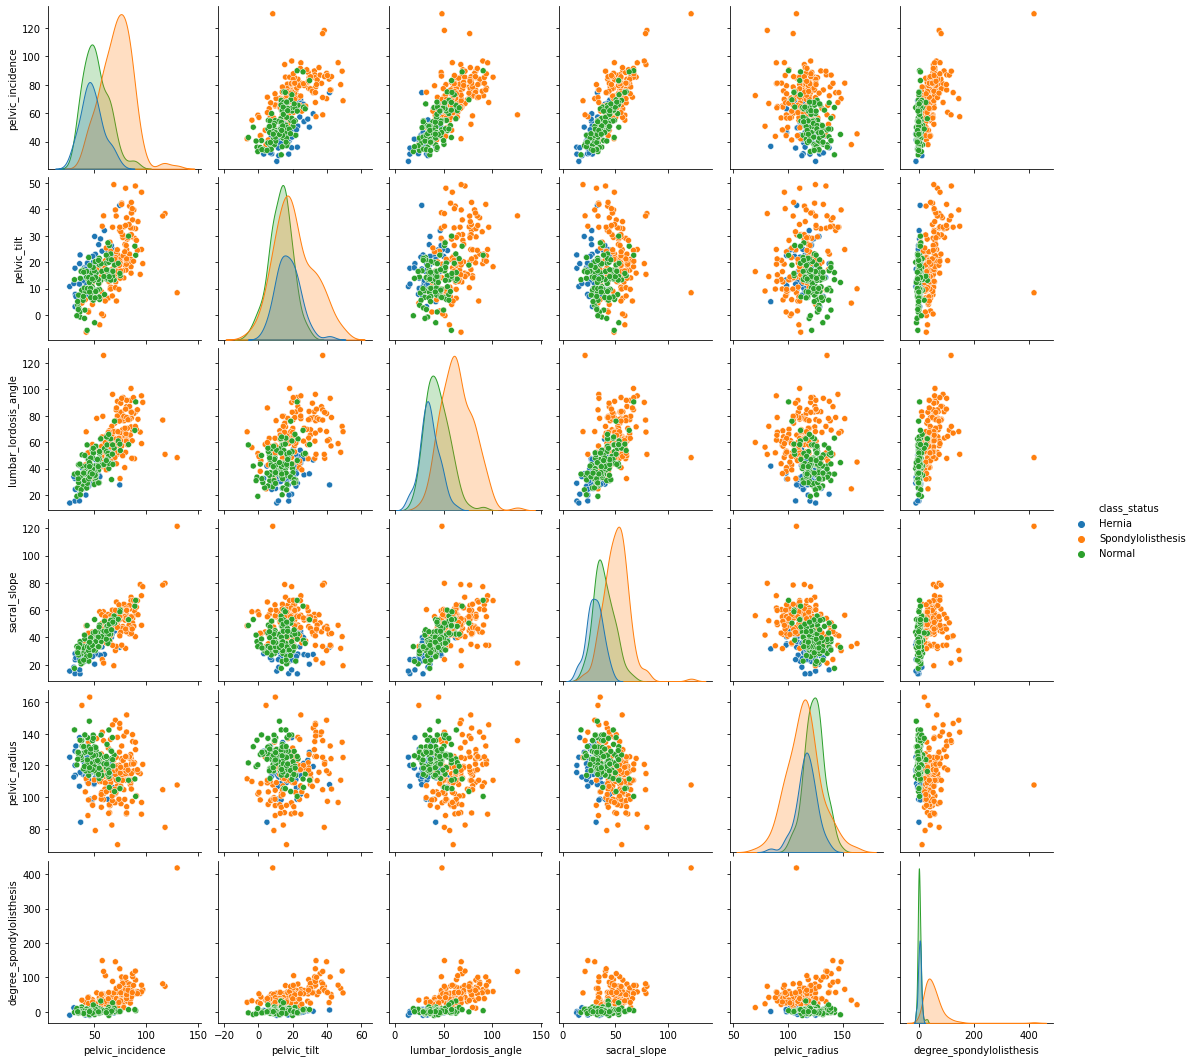

In [22]:
# Alternatif: Seaborn Pairplot
sns.pairplot(data=data, hue='class_status')

## Pre-procesing Data

In [23]:
# Pisahkan dataset menjadi x dan y menggunakna loc
x, y = data.loc[:, data.columns != 'class_status'], data.loc[:, 'class_status']

In [24]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))
x_scaled.head()

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [25]:
# Setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=32)

## Support Vector Machine

In [26]:
from sklearn.svm import SVC
# Buat model menggunakan Support Vector Machine
svc = SVC(kernel='rbf')

# Lakukan training dengan dataset train
svc.fit(X_train, y_train)

SVC()

In [27]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
y_pred = svc.predict(X_test)
print('Prediction', format(y_pred))

Prediction ['Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Normal' 'Spondylolisthesis' 'Hernia' 'Hernia' 'Hernia'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Hernia' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Normal' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Normal' 'Normal'
 'Normal' 'Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Hernia'
 'Hernia' 'Normal' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis'
 'Hernia' 'Spondylolisthesis' 'Normal' 'Normal' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Hernia' 'Spondylolisthesis' 'Normal'
 'Normal' 'Spondylolisthesis' 'Normal' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Normal' 'Normal' 'Normal' 'Hernia' 'Normal' 'Normal' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Normal' 'Normal' 'Hernia'
 'Normal' 'Hernia' 'Normal' 'Hernia' 'Normal' 'Normal' 'Normal' 'Normal'
 'Spondylolisthesis' 'Normal' 'Normal' 

In [28]:
# Print akurasi dari data testing menggunakan score
print('SVC Accuracy', format(svc.score(X_test, y_test)))

SVC Accuracy 0.7419354838709677


In [29]:
from sklearn.metrics import confusion_matrix
# Matriks confusion array using sklearn
cm = confusion_matrix(y_test, y_pred)

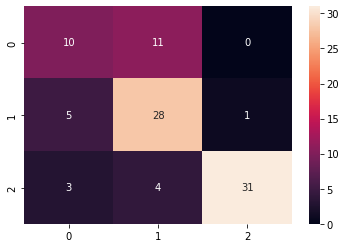

In [30]:
# Munculkan heatmap dari matriks confusion
sns.heatmap(cm, annot=True)

In [31]:
# Model Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.class_status.value_counts().index))

                   precision    recall  f1-score   support

Spondylolisthesis       0.56      0.48      0.51        21
           Normal       0.65      0.82      0.73        34
           Hernia       0.97      0.82      0.89        38

         accuracy                           0.74        93
        macro avg       0.73      0.71      0.71        93
     weighted avg       0.76      0.74      0.74        93



# Assignment
Carilah dataset yang menarik lalu gunakan
untuk melakukan klasifikasi menggunakan Support Vector Machine

---

# Rice Type Classification Dataset

**Dataset by [MsSmartyPants](https://www.kaggle.com/mssmartypants) from [Kaggle](https://www.kaggle.com/datasets/mssmartypants/rice-type-classification)**


## Load Dataset

In [32]:
# Load data dari link github berikut
url = 'https://raw.githubusercontent.com/ProboKrishnacahya/Rice_Type_Classification_Dataset/master/Rice_Type_Classification.csv'
data = pd.read_csv(url)

# Munculkan head() dari data
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [33]:
# Munculkan informasi dari column pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [34]:
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


Distribusi data tidak skewed / equally distributed.

## Pre-procesing Data

### Removing Outliers

In [35]:
data.drop(columns = ['id'], inplace=True)
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [36]:
data.Class.value_counts()

1    9985
0    8200
Name: Class, dtype: int64

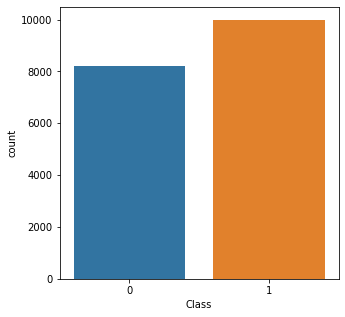

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class', data=data)
plt.show();

Terkonfirmasi bahwa data tidak skewed, sehingga tidak perlu downsample/upsample.

In [38]:
# Cek missing value
data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

Hasilnya adalah tidak terdapat adanya missing value.

In [39]:
data.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


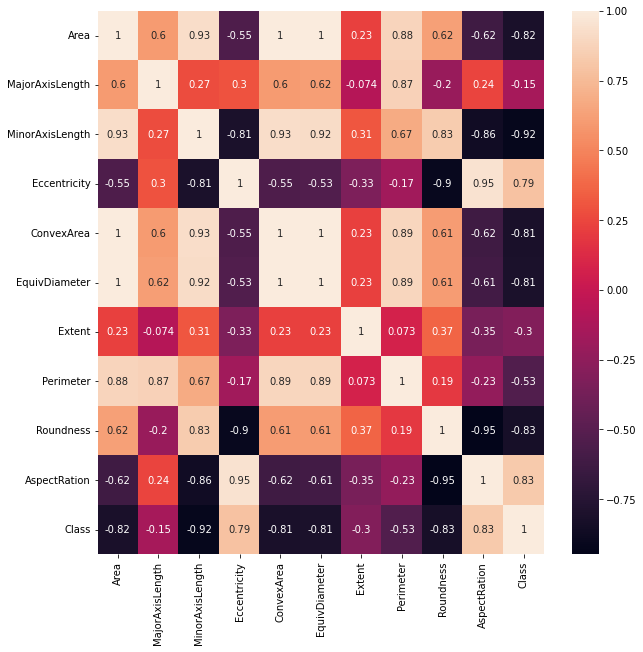

In [41]:
plt.figure(figsize=(10,10))
x = sns.heatmap(data.corr(), annot=True)
plt.show();

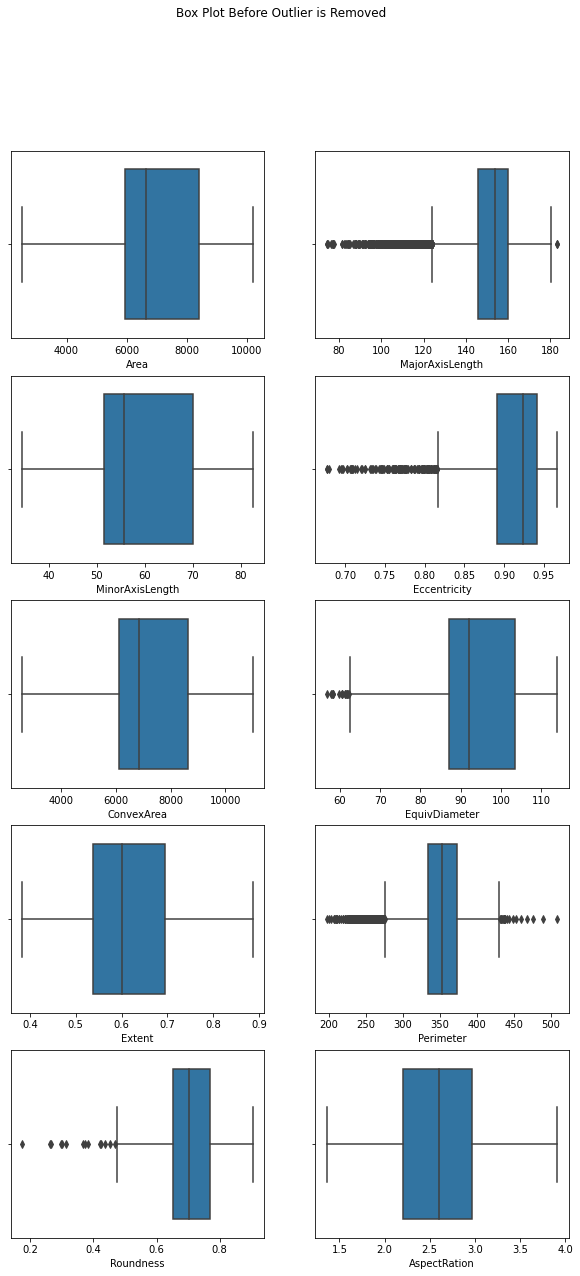

In [43]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
fig.suptitle('Box Plot Before Outlier is Removed')
k = 0
for i in range(0, 5):
  for j in range(0, 2):
    sns.boxplot(ax=axes[i, j], data=data, x=data.columns[k])
    k += 1

In [44]:
def iqr_calculation(col):
  Q1 = np.percentile(col, 25, interpolation = 'midpoint')
  Q3 = np.percentile(col, 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  upper = np.where(col >=(Q3 + 1.5 * IQR))
  lower = np.where(col <=(Q1 - 1.5 * IQR))
  return upper[0], lower[0]

# Remove outliers
def remove_outliers(df, upper, lower):
  df.drop(upper, inplace=True)
  df.drop(lower, inplace=True)
  print("New shape: ", df.shape)
  return df

In [46]:
df = data.copy()
for i in range(0, len(df.columns) - 1):
  print("Removing outliers for column: ", df.columns[i])
  upper, lower = iqr_calculation(df[df.columns[i]])
  df = remove_outliers(df, upper, lower)
  df.reset_index(drop=True, inplace=True)

Removing outliers for column:  Area
New shape:  (18185, 11)
Removing outliers for column:  MajorAxisLength
New shape:  (17647, 11)
Removing outliers for column:  MinorAxisLength
New shape:  (17647, 11)
Removing outliers for column:  Eccentricity
New shape:  (17631, 11)
Removing outliers for column:  ConvexArea
New shape:  (17631, 11)
Removing outliers for column:  EquivDiameter
New shape:  (17631, 11)
Removing outliers for column:  Extent
New shape:  (17631, 11)
Removing outliers for column:  Perimeter
New shape:  (17602, 11)
Removing outliers for column:  Roundness
New shape:  (17597, 11)
Removing outliers for column:  AspectRation
New shape:  (17597, 11)


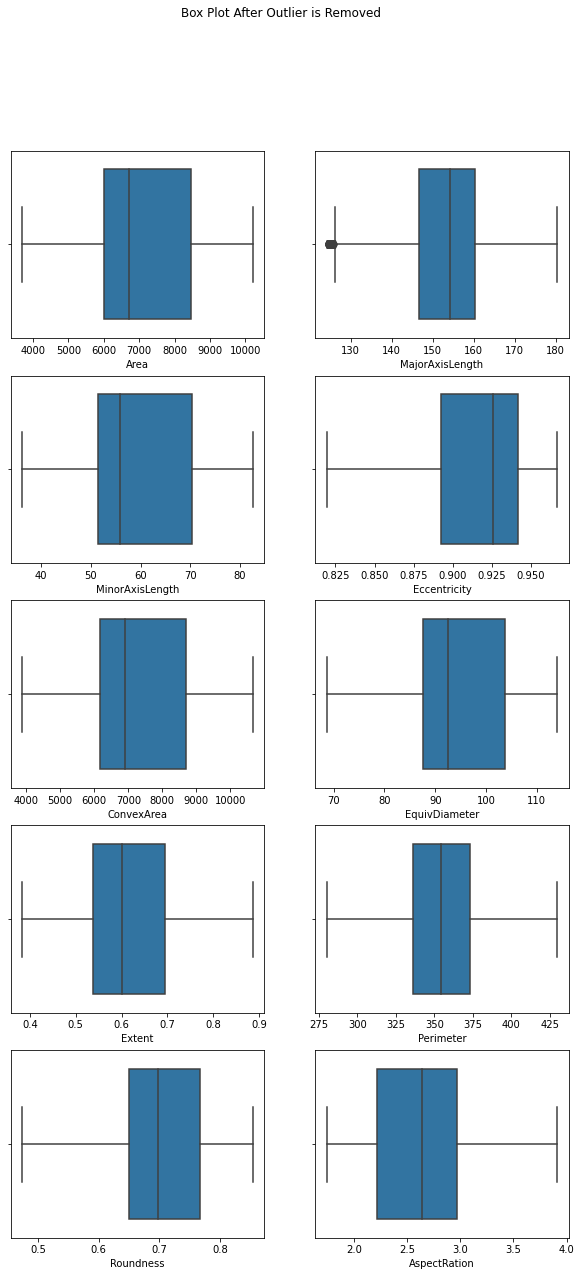

In [48]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
fig.suptitle('Box Plot After Outlier is Removed')
k = 0
for i in range(0, 5):
  for j in range(0, 2):
    sns.boxplot(ax=axes[i, j], data=df, x=df.columns[k])
    k += 1

### Splitting and Scaling

In [49]:
X, y = df[df.columns[:-1]], df['Class']
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,6374,129.576759,63.762307,0.870549,6476,90.086785,0.662234,314.656,0.809003,2.032184
1,6946,136.303603,65.738475,0.876009,7115,94.042128,0.594437,338.782,0.760508,2.073422
2,5786,125.555431,59.626250,0.880040,5945,85.831020,0.623491,307.304,0.769931,2.105707
3,5896,127.013995,59.843292,0.882050,6092,86.643063,0.610352,309.264,0.774655,2.122443
4,6082,129.098407,60.416315,0.883736,6204,87.999107,0.661375,308.106,0.805111,2.136814
...,...,...,...,...,...,...,...,...,...,...
17592,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535
17593,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910
17594,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396
17595,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
y_train

12783    0
13390    0
8359     1
9116     1
7564     1
        ..
9225     1
13123    0
9845     1
10799    1
2732     1
Name: Class, Length: 12317, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.07668049, -1.27869888,  0.44693966, ..., -0.62419391,
         0.99284448, -1.03557403],
       [-0.44847399, -1.72674881,  0.18829661, ..., -1.09982697,
         0.94496772, -0.99012954],
       [-0.60609747,  0.80706754, -0.93675029, ...,  0.36808642,
        -1.70430798,  1.34087036],
       ...,
       [-0.66335084,  1.10985316, -1.14369739, ...,  0.0158058 ,
        -1.35488022,  1.80849927],
       [-1.9179772 , -0.75105957, -2.111217  , ..., -1.6886267 ,
        -2.02983056,  2.67682055],
       [-0.40182309,  0.18729517, -0.49025145, ..., -0.10336389,
        -0.61129286,  0.46607228]])

## Support Vector Machine

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

param_grid = {
    'C': [0.5, 1, 1.5, 2, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ........C=0.5, degree=2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...........C=0.5, degree=2, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ..........C=0.5, degree=2, gamma=scale, kernel=poly; total time=   2.0s
[CV] END ..........C=0.5, degree=2, gamma=scale

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1, 1.5, 2, 10, 100], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [53]:
grid_search.best_params_

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [54]:
model = SVC(**grid_search.best_params_)

In [55]:
model.fit(X_train, y_train)

SVC(C=10, degree=2, kernel='linear')

In [56]:
model.score(X_train, y_train)

0.9910692538767557

In [57]:
model.score(X_test, y_test)

0.9895833333333334

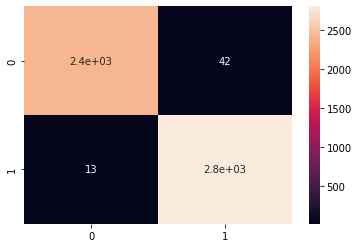

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))

sns.heatmap(cm, annot=True)
plt.show();

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2462
           1       0.99      1.00      0.99      2818

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280



In [60]:
# Compare with training data
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5593
           1       0.99      0.99      0.99      6724

    accuracy                           0.99     12317
   macro avg       0.99      0.99      0.99     12317
weighted avg       0.99      0.99      0.99     12317

